# Plotting

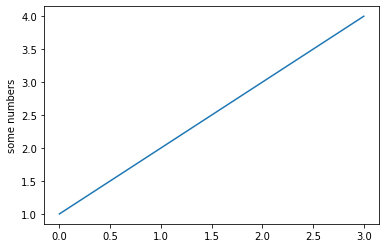

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

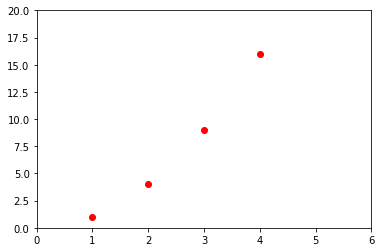

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

## Meaning of the symbols
#  b     blue          .     point              -     solid
#  g     green         o     circle             :     dotted
#  r     red           x     x-mark             -.    dashdot 
#  c     cyan          +     plus               --    dashed   
#  m     magenta       *     star             (none)  no line
#  y     yellow        s     square
#  k     black         d     diamond
#  w     white         v     triangle (down)
#                      ^     triangle (up)
#                      <     triangle (left)
#                      >     triangle (right)
#                      p     pentagram
#                      h     hexagram

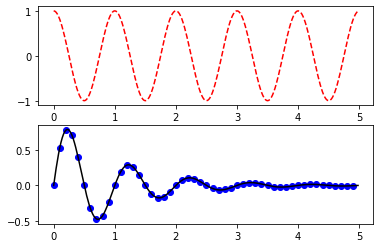

In [3]:
## Working with multiple figures and axes: 

import numpy as np

def f(t):
    return np.exp(-t) * np.sin(2*np.pi*t)

# e^{-t} sin(2 pi t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.subplot(212)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.show()

The subplot call specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows * numcols. The commas in the subplot call are optional if numrows * numcols < 10. So subplot(211) is identical to subplot(2, 1, 1).

You can create an arbitrary number of subplots and axes. If you want to place an Axes manually, i.e., not on a rectangular grid, use axes, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates.

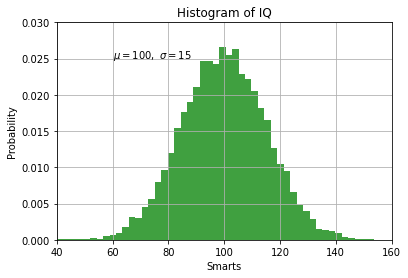

In [4]:
## Working with text

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Seaborn package

In [5]:
# # Import seaborn
# import seaborn as sns

# # Apply the default theme
# sns.set_theme()

# # Load an example dataset
# tips = sns.load_dataset("tips")

# # Create a visualization
# sns.relplot(
#     data=tips,
#     x="total_bill", y="tip", col="time",
#     hue="smoker", style="smoker", size="size",
# )

## Datasets

In [6]:
## Obtain the data (Boston Housing has some ethical problem)
# from sklearn.datasets import load_boston
# boston = load_boston()
# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True)

from sklearn.datasets import load_wine

winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Plot two coordinates

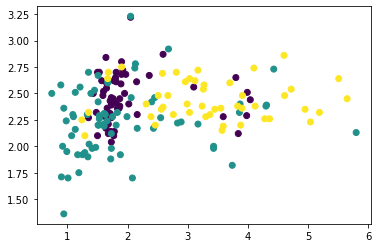

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)  # color is the type of wine
plt.show()

## PCA

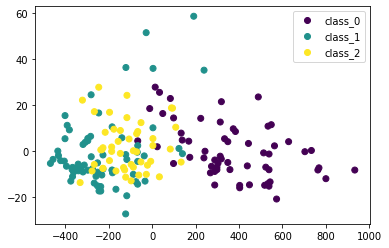

In [9]:
# X_new = X.select_dtypes('number').dropna()

from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()


Scaled version

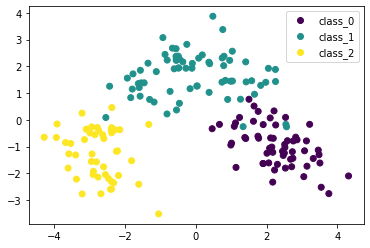

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

In [11]:
print(X)  # matrix format

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [12]:
import pandas as pd

X_pandas = pd.DataFrame(data=X)
X_pandas ## like data.frame/tibble format

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Examples of Basic python loops, examples 


In [13]:
flag = 1

if flag:
   print("Flag is true")
else:
   print("Flag is not true")

Flag is true


In [14]:
count = 0

while count < 10:
   print("Ongoing counting", count)
   count = count + 1
else:
   print("Stopped counting!!")

Ongoing counting 0
Ongoing counting 1
Ongoing counting 2
Ongoing counting 3
Ongoing counting 4
Ongoing counting 5
Ongoing counting 6
Ongoing counting 7
Ongoing counting 8
Ongoing counting 9
Stopped counting!!


### We would try to scale the wine data using for loop

In [15]:
num_rows, num_cols = X.shape

means = np.mean(X, axis=0)
sds = np.std(X, axis=0)
print(means)
print(sds)

[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]
[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]


In [16]:
## TODO, do the calculation of mean by hand

In [17]:
X_scaled = X

for i in range(num_rows):
  for j in range(num_cols):
    X_scaled[i, j] = (X[i, j] - means[j])/sds[j]

print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))


[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


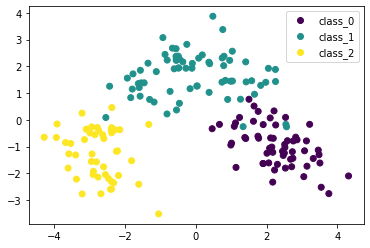

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_scaled)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()